# Table of Contents
 <p><div class="lev1"><a href="#Slide-paths-affecting-WYDOT-roadways:-analysis-of-BTAC-historical-data">Slide paths affecting WYDOT roadways: analysis of BTAC historical data</a></div><div class="lev1"><a href="#1.-Summary">1. Summary</a></div><div class="lev1"><a href="#2.-Teton-Pass-(Glory/Twin/Shovel)">2. Teton Pass (Glory/Twin/Shovel)</a></div><div class="lev2"><a href="#2.1-Event-timeseries">2.1 Event timeseries</a></div><div class="lev2"><a href="#2.2-Relative-Size">2.2 Relative Size</a></div><div class="lev2"><a href="#2.3-Trigger">2.3 Trigger</a></div><div class="lev1"><a href="#3.-South-Hwy-89-(Milepost-151)">3. South Hwy 89 (Milepost 151)</a></div><div class="lev2"><a href="#3.1-Event-Timeseries">3.1 Event Timeseries</a></div><div class="lev2"><a href="#3.2-Relative-Size">3.2 Relative Size</a></div><div class="lev2"><a href="#3.3-Trigger">3.3 Trigger</a></div><div class="lev1"><a href="#4.-Hoback-Canyon-(Cow-/Calf-/Bull-of-the-Woods)">4. Hoback Canyon (Cow-/Calf-/Bull-of-the-Woods)</a></div><div class="lev2"><a href="#4.1-Event-Timeseries">4.1 Event Timeseries</a></div><div class="lev2"><a href="#4.2-Relative-Size">4.2 Relative Size</a></div><div class="lev2"><a href="#4.3-Type">4.3 Type</a></div><div class="lev2"><a href="#4.4-Trigger">4.4 Trigger</a></div>

In [29]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View raw code"></form>''')

Use toggle button to view raw code if desired.

In [30]:
%matplotlib inline

# Slide paths affecting WYDOT roadways: analysis of BTAC historical data

**Patrick Wright, *Inversion Labs***

**Bob Comey, *Bridger-Teton National Forest Avalanche Center (BTAC)***

**September 19, 2016**

# 1. Summary

This report analyzes avalanche events affecting WYDOT roadways, as recorded in the BTAC historical database (1974-2016). Analysis includes the following paths:

**Glory Bowl, Twin Slides, Shovel Slide, Milepost 151 (Hwy 89), Cow-of-the-Woods, Calf-of-the-Woods, Bull-of-the-Woods.** 

We also searched the database for smaller infrequent slide paths, but did not complete any analysis.
These include:
* Surprise Slide (3 events)
* Rocky Gulch (3 events)
* Beaver Slides (11 events)
* Lets-Do-It (11 events)


The header for the BTAC database indicates available data columns: 

**Database Header:**

ID, fldDate, fldTime, textTime, PathName, CMType, fldType, Trigger, Size, Depth, Surface, Vertical, Layers, Notes, ListSummary, Location, GISName, Aspect, Elevation, Slope, DestructiveSize, PublicNotes, Zone, Latitude, Longitude, WebID

**The analysis below includes the following variables:** 

fldDate, PathName, fldType, Trigger, Size, DestructiveSize, Depth, Notes, PublicNotes

*note that 'Size' is relative size*

** Analysis for each slide path includes:**
* Link to a datatable with sortable columns (using Google Sheets)

* Plots (timeseries and histograms)

NOTES:

* Physical characteristics of the slide path for each event are not reported here (aspect, elevation, slope, latitude, longitude). However, for each path we list characteristics as given in the WYDOT Snow Avalanche Atlas. We have also not included any analysis of weather/snowpack variables (for Teton Pass, it would be best to use Phillips Bench or the WYDOT milepost 12 study plot in combination with JHMR stations). There is plenty of potential for further analysis of additional variables, or more detailed analysis within a single season or storm cycle. The following is intended as an initial exploration of the data.

* We have not analyzed 'Depth' (crown depth) data, as most of these entries are estimated and usually not directly observed.

* 'Notes' and 'Public Notes' were edited for grammar/content and combined. Quality checks on other variables resulted in manual editing for a small number of trigger code and relative size entries. Toggle the raw code below for record of all edited or removed entries.

* The are no records in the database for the 1991-92 season.

In [31]:
#!/usr/bin/env python

# Script to analyze slide paths affecting roadways managed by WYDOT

# Patrick Wright, Inversion Labs
# Job: BTAC
# started August 20, 2016

import numpy as np
import pandas as pd
from IPython import embed
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------

def histoplot_size(data,titlestring, xlabel):
	num_bins=np.arange(0.5, 6, 1)
	fig10 = plt.figure(figsize=(6.5,5))
	ax = fig10.add_subplot(111)
	n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha = 0.5)
	ax.set_title(titlestring, fontsize=18)
	ax.set_xlabel(xlabel, fontsize=18)
	ax.set_ylabel('Count', fontsize=18)
	ymin, ymax = ax.get_ylim()
	ax.set_ylim([0,(ymax+0.1*ymax)])
	plt.xticks(np.arange(1, 6, 1))
	plt.tick_params(axis='both', which='major', labelsize=18)
	fig10.tight_layout(pad=1.5)

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
def drop_false(dataframe,false_list):
  for entry in false_list:
    dataframe = dataframe[dataframe.pathname != entry]
  return dataframe

#--------------------------------------------------------------------------------------
# IMPORT EVENT DATA
#--------------------------------------------------------------------------------------

# Define directory paths:
fpath_4='data/PatrickHistoricalAvalancheTable.csv' # event table

# Read in data:
data4 = pd.read_csv(fpath_4, sep=',')

# Convert datetime strings to a Pandas datetime object
timestamp4 = data4['fldDate']
dt4 = pd.to_datetime(timestamp4, infer_datetime_format=True)

# set index of dataframes to datetime
data4_dt = data4.set_index(dt4)
data4_dt.sort_index(inplace=True)

# get rid of redundant date column:
data4_dt.drop('fldDate', axis=1, inplace=True)

#--------------------------------------------------------------------------------------
path = data4_dt.PathName
Type = data4_dt.fldType
trigger = data4_dt.Trigger
size_rel = data4_dt.Size
size_des = data4_dt.DestructiveSize
crown_depth = data4_dt.Depth
notes = data4_dt.Notes
notes_public = data4_dt.PublicNotes

# 2. Teton Pass (Glory/Twin/Shovel)

**Glory Bowl:** 196 events 

**[Link](https://drive.google.com/open?id=1Go_dQB37b4L3_UBO-I7tvxTZcu5b4tmd-ZggWQ7AnnA)** to Glory Bowl datatable

*Return Interval:* Very Frequent |
*Vertical Fall:* 2840 ft |
*Start Zone Elev:* 9960-9000 ft |
*Start Zone Aspect:* Southeast-Northeast

**Twin Slides:** 133 events

**[Link](https://drive.google.com/open?id=1Vawg9IB07QBChiM2TI4LHqv3j-eQY9o2h59gyJN5zRE)** to Twin Slides datatable

*Return Interval:* Very Frequent |
*Vertical Fall:* 2000 ft |
*Start Zone Elev:* 9840-8800 ft |
*Start Zone Aspect:* South

**Shovel Slide:** 21 events

**[Link](https://drive.google.com/open?id=1-LrPSjkvn8bYagkcsSSARgCX37RmkX6a-Qnn0PKXdVY)** to Shovel Slide datatable

*Return Interval:* Infrequent |
*Vertical Fall:* 1400 ft |
*Start Zone Elev:* 9520-8720 ft |
*Start Zone Aspect:* South to South-Southeast

***The data tables above can be sorted by column. Click on the small arrow on the right side of the lettered cells at the top of the sheet (A,B,C,...,H), and select 'Sort sheet A --> Z'.***

In [32]:
# GLORY BOWL

d = {'pathname':path, 'type':Type, 'trigger':trigger, 'R size':size_rel, 'D size':size_des, 
     'crown depth':crown_depth, 'notes':notes, 'public notes':notes_public}

full_table = pd.DataFrame(data=d, index=data4_dt.index)

Glory_table = full_table[full_table.pathname.str.contains('glory', case=False)==True]

Twin_table = full_table[full_table.pathname.str.contains('twin', case=False)==True] # No drop list

glory_drop_list = ['BowlnorthofGlory','n. of glory bowl','gloryBacksideWestAspect','glory/little tucks','BtwGlory&Shovelslide','glory great white hump',
                   'horseshoe bowl, n of glory','Glory Twin Slides','chicken scratch- mt glory','GloryTwinSlide','West side of Glory','Glory Chicken Scratch',
                   'Mt. Glory Twin Slide','Glory Chicken Scratch Couloir','Mt Glory Skiers left of First Turn','Mt Glory Chicken Scratch', 'North of Glory',
                   'gullynorthofgloryneaspect']

Glory_table = drop_false(Glory_table,glory_drop_list)

# move '2013-12-9' entry to Twin Slides and drop from Glory ('Glory bootpack trees'):
Gloryboot = Glory_table.ix['2013-12-09', :]
#print Gloryboot
Twin_table = Twin_table.append(Gloryboot)
Twin_table.sort_index(inplace=True)
#print Twin_table
Glory_table.drop(pd.Timestamp('2013-12-09 00:00:00'), inplace=True)
#print Glory_table

# manual changes for 'AO' codes:
Glory_table.set_value('1996-1-24', 'trigger', 'AX') # unspecified
Glory_table.set_value('2012-1-19', 'trigger', 'AX') # GAZEX (2 entries)
Glory_table.set_value('2012-1-20', 'trigger', 'AX') # GAZEX (2 entries)
Glory_table.set_value('2013-3-22', 'trigger', 'AX') # GAZEX
Glory_table.set_value('2013-12-3', 'trigger', 'AX') # GAZEX
Glory_table.set_value('2013-12-24', 'trigger', 'AX') # GAZEX
Glory_table.loc[(Glory_table.trigger=='AO') & (Glory_table.notes=='Gazex across the highway'), 'trigger'] = 'AX' # 1 of 2 '2015-2-4' events

#----------------------------------------------------------------------------------------------

glory_trigger_counts = Glory_table.trigger.value_counts()

# Add 0 for non-represented trigger code (else addition results in NaN):
glory_trigger_counts = glory_trigger_counts.append(pd.Series(0, index=[u'AF']))

def shift_dates_Glory(code):
    var = Glory_table.trigger[Glory_table.trigger==code]
    var.index = var.index + pd.Timedelta(weeks=12)
    var.index = var.index - pd.Timedelta(days=365)
    var_grouped_year = var.groupby(var.index.year).count()
    return var_grouped_year

glory_trigger_AA = shift_dates_Glory('AA')
glory_trigger_AE = shift_dates_Glory('AE')
glory_trigger_AX = shift_dates_Glory('AX')
glory_trigger_AS = shift_dates_Glory('AS')
glory_trigger_AD = shift_dates_Glory('AD')
glory_trigger_AR = shift_dates_Glory('AR')
glory_trigger_AO = shift_dates_Glory('AO')
glory_trigger_AF = shift_dates_Glory('AF')
glory_trigger_N = shift_dates_Glory('N')

# TWIN SLIDES

#Twin_table = full_table[full_table.pathname.str.contains('twin', case=False)==True] #moved above for entry from Glory --> Twin

# manual changes for 'AO' codes:
Twin_table.set_value('1989-2-21', 'trigger', 'AD') # boarder 
Twin_table.set_value('1994-12-17', 'R size', '3') # within new snow (4 --> 3)
Twin_table.set_value('2008-1-28', 'trigger', 'AD') # snowboarder exiting Twin slides
Twin_table.set_value('2012-1-19', 'trigger', 'AX') # GAZEX
Twin_table.set_value('2012-1-20', 'trigger', 'AX') # unspecified
Twin_table.set_value('2015-2-4', 'trigger', 'AX') # GAZEX

Twin_table.drop(pd.Timestamp('2014-2-16 00:00:00'), inplace=True) # Twin Bridges

twin_trigger_counts = Twin_table.trigger.value_counts()

def shift_dates_Twin(code):
    var = Twin_table.trigger[Twin_table.trigger==code]
    var.index = var.index + pd.Timedelta(weeks=12)
    var.index = var.index - pd.Timedelta(days=365)
    var_grouped_year = var.groupby(var.index.year).count()
    return var_grouped_year

twin_trigger_AA = shift_dates_Twin('AA')
twin_trigger_AE = shift_dates_Twin('AE')
twin_trigger_AX = shift_dates_Twin('AX')
twin_trigger_AS = shift_dates_Twin('AS')
twin_trigger_AD = shift_dates_Twin('AD')
twin_trigger_AR = shift_dates_Twin('AR')
twin_trigger_AO = shift_dates_Twin('AO')
twin_trigger_AF = shift_dates_Twin('AF')
twin_trigger_N = shift_dates_Twin('N')

# SHOVEL SLIDE

Shovel_table = full_table[full_table.pathname.str.contains('shovel', case=False)==True]

shovel_drop_list = ['AngleMtnshovelSlideESEAspect']

Shovel_table = drop_false(Shovel_table,shovel_drop_list)

shovel_trigger_counts = Shovel_table.trigger.value_counts()

# Add 0 for non-represented trigger codes (else addition results in NaN):
shovel_trigger_counts = shovel_trigger_counts.append(pd.Series([0,0,0], index=[u'AF',u'AO',u'AX']))

# function to group dates into one season (i.e. 1995 is events for 1995-96 season)
def shift_dates_Shovel(code):
    var = Shovel_table.trigger[Shovel_table.trigger==code]
    var.index = var.index + pd.Timedelta(weeks=12) # forward 3 months
    var.index = var.index - pd.Timedelta(days=365) # back one year
    var_grouped_year = var.groupby(var.index.year).count()
    return var_grouped_year

shovel_trigger_AA = shift_dates_Shovel('AA')
shovel_trigger_AE = shift_dates_Shovel('AE')
shovel_trigger_AX = shift_dates_Shovel('AX')
shovel_trigger_AS = shift_dates_Shovel('AS')
shovel_trigger_AD = shift_dates_Shovel('AD')
shovel_trigger_AR = shift_dates_Shovel('AR')
shovel_trigger_AO = shift_dates_Shovel('AO')
shovel_trigger_AF = shift_dates_Shovel('AF')
shovel_trigger_N = shift_dates_Shovel('N')

#--------------------------------------------------------------------------------------

# COMBINED
continuous_index = np.arange(1974, 2016, 1)

def combine_pass(name1,name2,name3):
    twin = name1.reindex(continuous_index).fillna(0)
    glory = name2.reindex(continuous_index).fillna(0)
    shovel = name3.reindex(continuous_index).fillna(0)
    combined = twin + glory + shovel
    return combined
    
combined_AA_pass = combine_pass(twin_trigger_AA, glory_trigger_AA, shovel_trigger_AA)
combined_AE_pass = combine_pass(twin_trigger_AE, glory_trigger_AE, shovel_trigger_AE)
combined_AX_pass = combine_pass(twin_trigger_AX, glory_trigger_AX, shovel_trigger_AX)
combined_AS_pass = combine_pass(twin_trigger_AS, glory_trigger_AS, shovel_trigger_AS)
combined_AD_pass = combine_pass(twin_trigger_AD, glory_trigger_AD, shovel_trigger_AD)
combined_AR_pass = combine_pass(twin_trigger_AR, glory_trigger_AR, shovel_trigger_AR)
combined_AO_pass = combine_pass(twin_trigger_AO, glory_trigger_AO, shovel_trigger_AO)
combined_AF_pass = combine_pass(twin_trigger_AF, glory_trigger_AF, shovel_trigger_AF)
combined_N_pass = combine_pass(twin_trigger_N, glory_trigger_N, shovel_trigger_N)

combined_artificial_explosive_pass = combined_AA_pass + combined_AE_pass + combined_AX_pass + combined_AO_pass

combined_human_pass = combined_AS_pass + combined_AD_pass + combined_AR_pass + combined_AF_pass

#-------------------------------------------------------------------

combined_trigger_counts = glory_trigger_counts + twin_trigger_counts + shovel_trigger_counts

# Combine skier and snowboarder codes:
AS_AR_AD = pd.Series((combined_trigger_counts['AS'] + combined_trigger_counts['AR']
                      + combined_trigger_counts['AD']), index=[u'AS/AR/AD'])

# Add combined code to Series and sort:
combined_trigger_counts = combined_trigger_counts.append(AS_AR_AD)
combined_trigger_counts.sort_values(ascending=False, inplace=True)
#print combined_trigger_counts

# Remove AS, AR, AD codes:
combined_trigger_counts.drop(combined_trigger_counts.index[[2,6,7]], inplace=True)
#print combined_trigger_counts

#--------------------------------------------------------------------------------------
# ROUTINE TO PLOT EVENTS BY YEAR (so that year indicates season, i.e. 2015 is 2015-16 season)
# Note that the month and day become incorrect in the shifted table!! (only plot years)

Glory_table_shift = Glory_table.copy() # Make a copy of dataframe for date shifting
Glory_table_shift.index = Glory_table_shift.index + pd.Timedelta(weeks=12)
Glory_table_shift.index = Glory_table_shift.index - pd.Timedelta(days=365)
Glory_table_shift_grouped = Glory_table_shift.groupby(Glory_table_shift.index.year).count()

Twin_table_shift = Twin_table.copy() # Make a copy of dataframe for date shifting
Twin_table_shift.index = Twin_table_shift.index + pd.Timedelta(weeks=12)
Twin_table_shift.index = Twin_table_shift.index - pd.Timedelta(days=365)
Twin_table_shift_grouped = Twin_table_shift.groupby(Twin_table_shift.index.year).count()

Shovel_table_shift = Shovel_table.copy() # Make a copy of dataframe for date shifting
Shovel_table_shift.index = Shovel_table_shift.index + pd.Timedelta(weeks=12)
Shovel_table_shift.index = Shovel_table_shift.index - pd.Timedelta(days=365)
Shovel_table_shift_grouped = Shovel_table_shift.groupby(Shovel_table_shift.index.year).count()

## 2.1 Event timeseries

Below is a chronological record of the number of events per season in the BTAC dataset for each path. Note that this record is biased by the regularity of event recording over the years, and reflects many factors such as increases in skier traffic, changes in control work methods and frequency, etc... These factors are explored further below.

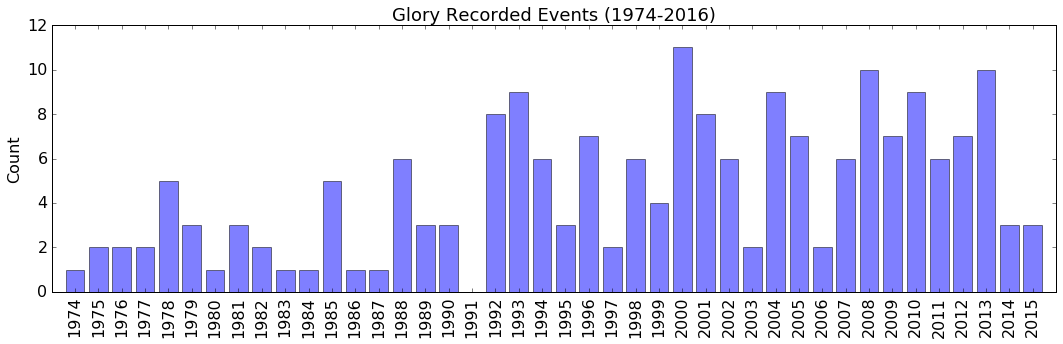

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(Glory_table_shift_grouped.index, Glory_table_shift_grouped.pathname, align='center', color='b', alpha=0.5)
plt.xticks(np.arange(1974, 2016, 1))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
ax.set_ylim(0,12)
ax.set_xlim(1973,2016)
plt.title('Glory Recorded Events (1974-2016)', fontsize=18)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(Twin_table_shift_grouped.index, Twin_table_shift_grouped.pathname, align='center', color='b', alpha=0.5)
plt.xticks(np.arange(1974, 2016, 1))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
ax.set_ylim(0,12)
ax.set_xlim(1973,2016)
plt.title('Twin Slides Recorded Events (1974-2016)', fontsize=18)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(Shovel_table_shift_grouped.index, Shovel_table_shift_grouped.pathname, align='center', color='b', alpha=0.5)
plt.xticks(np.arange(1974, 2016, 1))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
ax.set_ylim(0,12)
ax.set_xlim(1973,2016)
plt.title('Shovel Slide Recorded Events (1974-2016)', fontsize=18)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

***For x-axis years above: year indicates following season. i.e. '1995' indicates events for the '1995-96' season.***

## 2.2 Relative Size

Destructive size was not regularly recorded until ~2009. Below is distribution of relative size, which has a longer record.

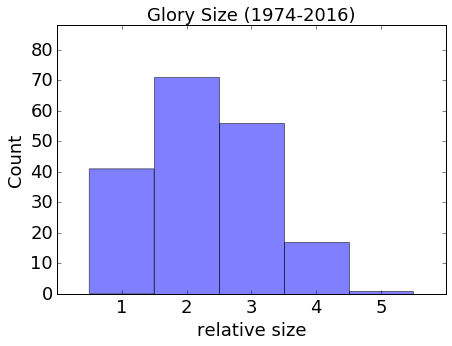

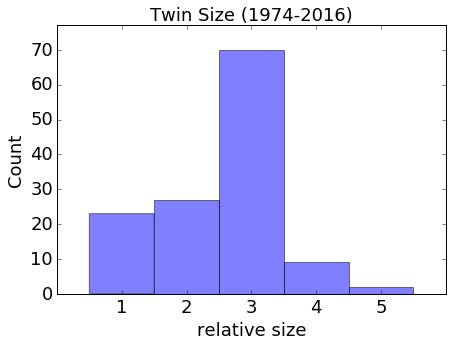

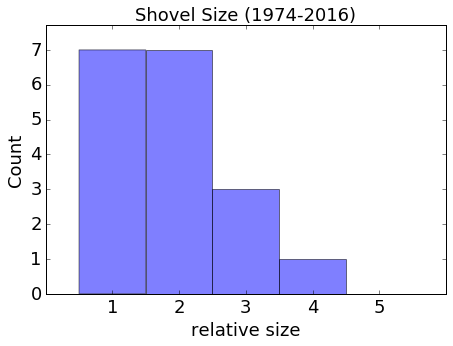

In [34]:
histoplot_size(Glory_table['R size'],'Glory Size (1974-2016)', 'relative size')
histoplot_size(Twin_table['R size'],'Twin Size (1974-2016)', 'relative size')
histoplot_size(Shovel_table['R size'],'Shovel Size (1974-2016)', 'relative size')

**Separating the size data into periods before and after 1990**: we see relatively more R3-R4 events before 1990 (median R3), and more R1-R2 events after 1990 (median R2). The increase in the number of smaller size events likely corresponds to increases in skier traffic after ~1990.

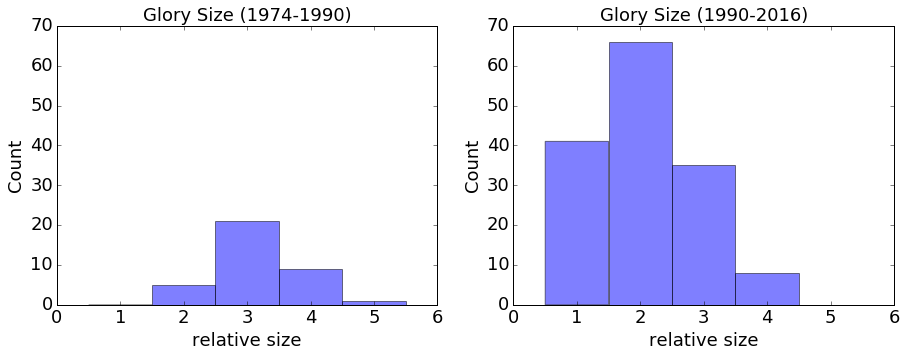

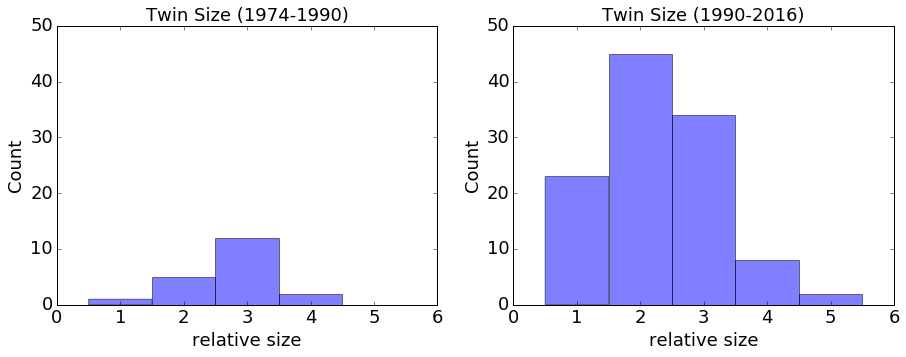

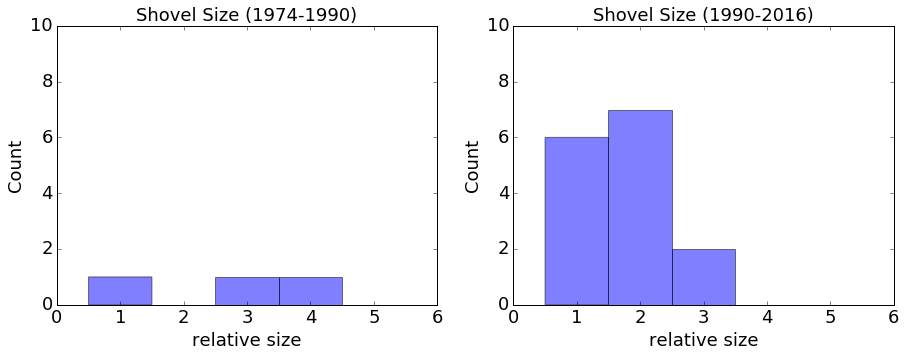

In [35]:
Glory_early = Glory_table['R size'][ : '1990-04-01']
Glory_late = Glory_table['R size']['1990-04-01' : ]

plt.figure(figsize=(15,5))

plt.subplot(121)
bins = np.arange(0.5, 6, 1)
plt.hist(Glory_early, bins, alpha=0.5, label='x')
plt.title('Glory Size (1974-1990)', fontsize=18)
ax = plt.gca()
ax.set_xlabel('relative size', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0,70)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.subplot(122)
bins = np.arange(0.5, 6, 1)
plt.hist(Glory_late, bins, alpha=0.5, label='x')
plt.title('Glory Size (1990-2016)', fontsize=18)
ax = plt.gca()
ax.set_xlabel('relative size', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

#-----------------------------------------------------------

Twin_early = Twin_table['R size'][ : '1990-04-01']
Twin_late = Twin_table['R size']['1990-04-01' : ]

plt.figure(figsize=(15,5))

plt.subplot(121)
bins = np.arange(0.5, 6, 1)
plt.hist(Twin_early, bins, alpha=0.5, label='x')
plt.title('Twin Size (1974-1990)', fontsize=18)
ax = plt.gca()
ax.set_xlabel('relative size', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0,50)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.subplot(122)
bins = np.arange(0.5, 6, 1)
plt.hist(Twin_late, bins, alpha=0.5, label='x')
plt.title('Twin Size (1990-2016)', fontsize=18)
ax = plt.gca()
ax.set_xlabel('relative size', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0,50)
plt.tick_params(axis='both', which='major', labelsize=18)

#-----------------------------------------------------------

Shovel_early = Shovel_table['R size'][ : '1990-04-01']
Shovel_late = Shovel_table['R size']['1990-04-01' : ]

plt.figure(figsize=(15,5))

plt.subplot(121)
bins = np.arange(0.5, 6, 1)
plt.hist(Shovel_early, bins, alpha=0.5, label='x')
plt.title('Shovel Size (1974-1990)', fontsize=18)
ax = plt.gca()
ax.set_xlabel('relative size', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0,10)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.subplot(122)
bins = np.arange(0.5, 6, 1)
plt.hist(Shovel_late, bins, alpha=0.5, label='x')
plt.title('Shovel Size (1990-2016)', fontsize=18)
ax = plt.gca()
ax.set_xlabel('relative size', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0,10)
plt.tick_params(axis='both', which='major', labelsize=18)

## 2.3 Trigger

Distribution of event triggers for Glory Bowl, Twin Slides and Shovel slide combined:

In [36]:
fig, axs = plt.subplots(1,1,figsize=(9 * 1.618, 9))
combined_trigger_counts.plot(kind='bar', alpha=0.5)
plt.xlabel('Trigger code', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Glory/Twin/Shovel combined: triggers by type (1974-2016)', fontsize=18)

t1 = axs.text(0.7,0.92, '           AX: Gazex', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t2 = axs.text(0.7,0.88, 'AS/AR/AD: Skier/Snowboarder', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t3 = axs.text(0.7,0.84, '             N: Natural', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t4 = axs.text(0.7,0.80, '           AA: Artillery', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t5 = axs.text(0.7,0.76, '           AE: Explosive', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t6 = axs.text(0.7,0.72, '           AO: 25 lb heli bomb', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t7 = axs.text(0.7,0.68, '           AF: Foot penetration', ha='left', color='k', fontsize=16, transform=axs.transAxes)
fig.canvas.draw()

Below are two time-series plots showing trends for event triggers. The first plot groups all artificial explosive triggers (artillery, Gazex, Avalanche Guard, other explosives), all human triggers (skier, snowboarder, foot penetration), and natural triggers. The second plot shows cumulative counts for event triggers. Some interesting trends include:
* Only 5 human-triggered events before 1992, with fairly constant increase in cumulative human-triggers afterwards.
* Substantial increase in control-related events in 1992 with the installation of the original Gazex system.
* Decrease in natural triggers after ~2006.
* No artillery triggers after 2002.

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(combined_artificial_explosive_pass.index-0.3, combined_artificial_explosive_pass, width=0.3, align='center',
       color='black', alpha=0.4, label='Artificial Control (AX, AA, AE, AO)')
ax.bar(combined_human_pass.index, combined_human_pass, width=0.3, align='center', color='red', alpha=0.5,
       label='Artificial Human (AS, AR, AD, AF)')
ax.bar(combined_N_pass.index+0.3, combined_N_pass, width=0.3, align='center', color='blue', alpha=0.5, label='Natural (N)')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
plt.title('Glory/Twin/Shovel combined: Artificial and Natural triggers', fontsize=18)
plt.xticks(np.arange(1974, 2016, 1))
plt.legend(loc=2, fontsize=16)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

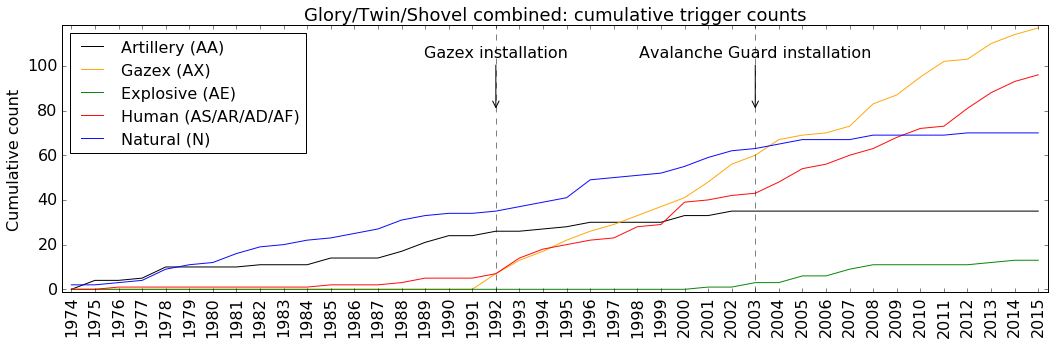

In [38]:
cum_AA = combined_AA_pass.cumsum()
cum_AX = combined_AX_pass.cumsum()
cum_AE = combined_AE_pass.cumsum()
cum_human = combined_human_pass.cumsum()
cum_natural = combined_N_pass.cumsum()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(cum_AA, color='black', label='Artillery (AA)')
ax.plot(cum_AX, color='orange', alpha=0.95, label='Gazex (AX)')
ax.plot(cum_AE, color='green', alpha=0.95, label='Explosive (AE)')
ax.plot(cum_human, color='r', alpha=0.95, label='Human (AS/AR/AD/AF)')
ax.plot(cum_natural, color='b', alpha=0.95, label='Natural (N)')

ax.annotate('Gazex installation', fontsize = 16, xy=(1992, 80),
                xycoords='data',
                xytext=(0, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                horizontalalignment='center', verticalalignment='bottom',
                )

ax.annotate('Avalanche Guard installation', fontsize = 16, xy=(2003, 80),
                xycoords='data',
                xytext=(0, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                horizontalalignment='center', verticalalignment='bottom',
                )
    
plt.axvline(x=1992,color='k', alpha=0.5, ls='dashed')
plt.axvline(x=2003,color='k', alpha=0.5, ls='dashed')

plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Cumulative count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
plt.title('Glory/Twin/Shovel combined: cumulative trigger counts', fontsize=18)
plt.xticks(np.arange(1974, 2016, 1))
plt.legend(loc=2, fontsize=16)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

Below is a timeseries of artificial control-related triggers (artillery, Gazex, explosive). The shift from artillery to Gazex is clearly visible, but it also looks like data entry can be inconsistent (e.g. lack of artillery records for many seasons in 1970s and 1980s).

It is not always clear what the 'AE' code represents. SWAG indicates "An explosive thrown or placed on or under the snow surface by hand." The event notes indicate that heli-bombs and the Avalanche Guard have been included with this code (with exception to large 25-lb heli-bombs (2 events) which are classified as 'AO'). Occasionally 'AE' is used with the general comment 'WYDOT control work'.

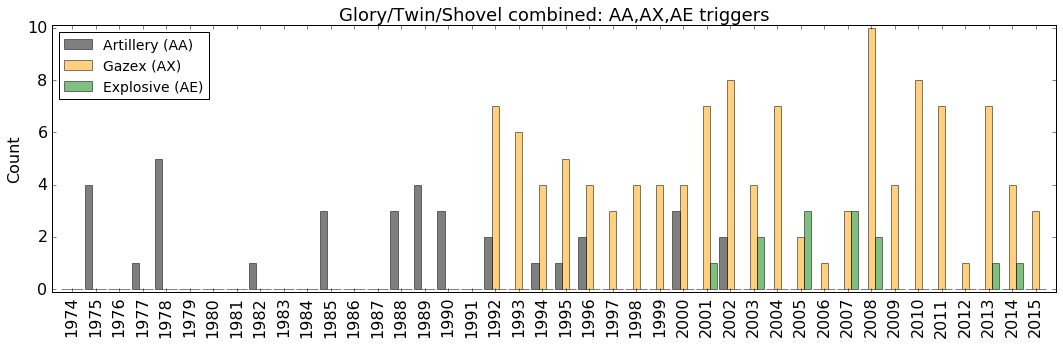

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(combined_AA_pass.index-0.3, combined_AA_pass, width=0.3, align='center', color='black', alpha=0.5, label='Artillery (AA)')
ax.bar(combined_AX_pass.index, combined_AX_pass, width=0.3, align='center', color='orange', alpha=0.5, label='Gazex (AX)')
ax.bar(combined_AE_pass.index+0.3, combined_AE_pass, width=0.3, align='center', color='g', alpha=0.5, label='Explosive (AE)')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
plt.title('Glory/Twin/Shovel combined: AA,AX,AE triggers', fontsize=18)
plt.xticks(np.arange(1974, 2016, 1))
plt.legend(loc=2, fontsize=14)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

***For x-axis years above: year indicates following season. i.e. '1995' indicates events for the '1995-96' season.***

# 3. South Hwy 89 (Milepost 151)

**MP 151:** 16 events 

**[Link](https://drive.google.com/open?id=1SMHJE3M5Gz3Eg-l_TQYCmuSB6zsIErfF82UZt47J1w0)** to MP 151 datatable

*Return Interval:* Frequent - Very Frequent |
*Vertical Fall:* 1130 ft |
*Start Zone Elev:* 7240-6800 ft |
*Start Zone Aspect:* North-Northwest to West

***The data table above can be sorted by column. Click on the small arrow on the right side of the lettered cells at the top of the sheet (A,B,C,...,H), and select 'Sort sheet A --> Z'.***

In [40]:
# MILEPOST 151

mp151_table = full_table[full_table.pathname.str.contains('151', case=False)==True]

mp151_drop_list = ['s. park gravel pit (HWY 151)']

mp151_table = drop_false(mp151_table,mp151_drop_list)

In [41]:
# Drop 2 redundant entries from 2008-02-01:
mp151_table = mp151_table.reset_index()
mp151_table.drop(mp151_table.index[[13]], inplace=True) # Date: '2008-02-01', Trigger: 'N', R Size: '1' 
mp151_table.drop(mp151_table.index[[14]], inplace=True) # Date: '2008-02-01', Trigger: 'N', R Size: '2'
#print mp151_table
mp151_table.set_index('fldDate', inplace=True)
mp151_table.drop('index', inplace=True)
#print mp151_table

# Change trigger code for first entry:
mp151_table.set_value('1996-12-26', 'trigger', 'AW') # wildlife

#print len(mp151_table)
#----------------------------------------------------------------------------------------------

mp151_trigger_counts = mp151_table.trigger.value_counts()

def shift_dates_mp151(code):
    var = mp151_table.trigger[mp151_table.trigger==code]
    var.index = var.index + pd.Timedelta(weeks=12)
    var.index = var.index - pd.Timedelta(days=365)
    var_grouped_year = var.groupby(var.index.year).count()
    return var_grouped_year

mp151_trigger_AA = shift_dates_Glory('AA')
mp151_trigger_AW = shift_dates_Glory('AW')
mp151_trigger_N = shift_dates_Glory('N')

#--------------------------------------------------------------------------------------
# ROUTINE TO PLOT EVENTS BY YEAR (so that year indicates season, i.e. 2015 is 2015-16 season)
# Note that the month and day become incorrect in the shifted table!! (only plot years)

mp151_table_shift = mp151_table.copy() # Make a copy of dataframe for date shifting
mp151_table_shift.index = mp151_table_shift.index + pd.Timedelta(weeks=12)
mp151_table_shift.index = mp151_table_shift.index - pd.Timedelta(days=365)
mp151_table_shift_grouped = mp151_table_shift.groupby(mp151_table_shift.index.year).count()

## 3.1 Event Timeseries

There are 16 recorded events after 1996, likely with some irregularity in recording throughout this time period. Using the BTAC records, the milepost 151 path averages 0.8 events per season, whereas literature reports an average of 1.5-2.0 events per season (Hewes et al., 2008). Two R4 events are recorded: 12/26/1996 (wildlife trigger) and 1/1/2004 (natural trigger).

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(mp151_table_shift_grouped.index, mp151_table_shift_grouped.pathname, align='center', color='b', alpha=0.5)

ax.annotate('snow sail installation', fontsize = 14, xy=(2002, 3.5),
                xycoords='data',
                xytext=(0, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                horizontalalignment='center', verticalalignment='bottom',
                )
    
plt.axvline(x=2002,color='k', alpha=0.5, ls='dashed')

ax.annotate('supporting structures installation', fontsize = 14, xy=(2012, 3.5),
                xycoords='data',
                xytext=(0, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                horizontalalignment='center', verticalalignment='bottom',
                )
    
plt.axvline(x=2012,color='k', alpha=0.5, ls='dashed')
plt.xticks(np.arange(1974, 2016, 1))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
ax.set_ylim(0,5)
ax.set_xlim(1973,2016)
plt.title('Milepost 151 Recorded Events (1974-2016)', fontsize=18)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

***For x-axis years above: year indicates following season. i.e. '1995' indicates events for the '1995-96' season.***

## 3.2 Relative Size

In [43]:
histoplot_size(mp151_table['R size'],'Milepost 151 Size (1974-2016)', 'relative size')

## 3.3 Trigger

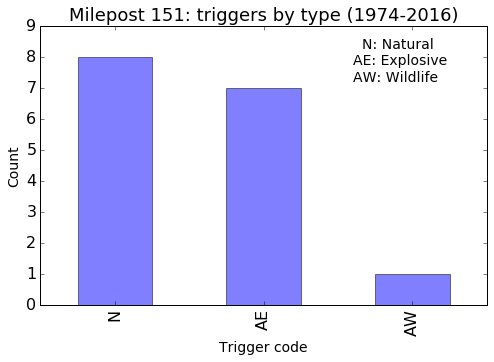

In [44]:
fig, axs = plt.subplots(1,1,figsize=(8, 5))
mp151_trigger_counts.plot(kind='bar', alpha=0.5)
plt.xlabel('Trigger code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
axs.set_ylim(0,9)
plt.title('Milepost 151: triggers by type (1974-2016)', fontsize=18)

t1 = axs.text(0.7,0.92, '  N: Natural', ha='left', color='k', fontsize=14, transform=axs.transAxes)
t2 = axs.text(0.7,0.86, 'AE: Explosive', ha='left', color='k', fontsize=14, transform=axs.transAxes)
t3 = axs.text(0.7,0.80, 'AW: Wildlife', ha='left', color='k', fontsize=14, transform=axs.transAxes)
fig.canvas.draw()

# 4. Hoback Canyon (Cow-/Calf-/Bull-of-the-Woods)

**Cow-of-the-Woods:** 91 events 

**[Link](https://drive.google.com/open?id=1sKJjgjU_wqmrJdkj_PC1AvBfdBlxL7ZrTfh4tC97bco)** to Cow-of-the-Woods datatable

*Return Interval:* Very Frequent |
*Vertical Fall:* 1550 ft |
*Start Zone Elev:* 7750-7200 ft |
*Start Zone Aspect:* North to Northwest

**Calf-of-the-Woods:** 17 events 

**[Link](https://drive.google.com/open?id=1HJXyIOUpt50VEJH2GyxnPlovvSUVXgV5DyEd8WHEJP8)** to Calf-of-the-Woods datatable

*Return Interval:* Very Frequent |
*Vertical Fall:* 1050 ft |
*Start Zone Elev:* 7200-7000 ft |
*Start Zone Aspect:* North to Northwest

**Bull-of-the-Woods:** 1 event 

**[Link](https://drive.google.com/open?id=1VaeFht1hIOtVF9a1MRxCwsYRHFikDeUPX-QTcwHwmYM)** to Bull-of-the-Woods datatable

*Return Interval:* Infrequent |
*Vertical Fall:* 2850 ft |
*Start Zone Elev:* 9000-7600 ft |
*Start Zone Aspect:* Northwest, North, Northeast, & East

***The data tables above can be sorted by column. Click on the small arrow on the right side of the lettered cells at the top of the sheet (A,B,C,...,H), and select 'Sort sheet A --> Z'.***

In [45]:
#--------------------------------------------------------------------------------------

# COW, CALF, BULL

cow_table = full_table[full_table.pathname.str.contains('cow', case=False)==True]

cow_drop_list = ['cow slide in yellowstone','Cowboys and Indians','Cowboys&Indians']
cow_table = drop_false(cow_table,cow_drop_list)

cow_table.set_value('1997-12-29', 'trigger', 'AE') # heli bomb
cow_table.loc[(cow_table.trigger=='N') & (cow_table.notes=='some powder debris to road edge'), 'R size'] = '2' # 1 of 2 '2006-12-13' events
cow_table.loc[(cow_table.type=='SS') & (cow_table.notes=='obell x by WYDOT very small slide'), 'trigger'] = 'AX' # 1 of 2 '2015-3-12' events

calf_table = full_table[full_table.pathname.str.contains('calf', case=False)==True]

bull_table = full_table[full_table.pathname.str.contains('Bull of the Woods', case=False)==True] #only one unique record

In [46]:
cow_trigger_counts = cow_table.trigger.value_counts()
calf_trigger_counts = calf_table.trigger.value_counts()

cow_type_counts = cow_table.type.value_counts()
calf_type_counts = calf_table.type.value_counts()

def shift_dates_cow(code):
    var = cow_table.trigger[cow_table.trigger==code]
    var.index = var.index + pd.Timedelta(weeks=12)
    var.index = var.index - pd.Timedelta(days=365)
    var_grouped_year = var.groupby(var.index.year).count()
    return var_grouped_year

cow_trigger_AA = shift_dates_cow('AA')
cow_trigger_AE = shift_dates_cow('AE')
cow_trigger_AX = shift_dates_cow('AX')
cow_trigger_N = shift_dates_cow('N')

def shift_dates_calf(code):
    var = calf_table.trigger[calf_table.trigger==code]
    var.index = var.index + pd.Timedelta(weeks=12)
    var.index = var.index - pd.Timedelta(days=365)
    var_grouped_year = var.groupby(var.index.year).count()
    return var_grouped_year

calf_trigger_AA = shift_dates_calf('AA')
calf_trigger_AE = shift_dates_calf('AE')
calf_trigger_AX = shift_dates_calf('AX')
calf_trigger_N = shift_dates_calf('N')

#--------------------------------------------------------------------------------------
# ROUTINE TO PLOT EVENTS BY YEAR (so that year indicates season, i.e. 2015 is 2015-16 season)
# Note that the month and day become incorrect in the shifted table!! (only plot years)

cow_table_shift = cow_table.copy() # Make a copy of dataframe for date shifting
cow_table_shift.index = cow_table_shift.index + pd.Timedelta(weeks=12)
cow_table_shift.index = cow_table_shift.index - pd.Timedelta(days=365)
cow_table_shift_grouped = cow_table_shift.groupby(cow_table_shift.index.year).count()

calf_table_shift = calf_table.copy() # Make a copy of dataframe for date shifting
calf_table_shift.index = calf_table_shift.index + pd.Timedelta(weeks=12)
calf_table_shift.index = calf_table_shift.index - pd.Timedelta(days=365)
calf_table_shift_grouped = calf_table_shift.groupby(calf_table_shift.index.year).count()

## 4.1 Event Timeseries

Only one event is recorded for Bull-of-the-Woods, an historic R5/D5 event occurring on 2/16/2014. The record of events for Cow- and Calf-of-the-Woods is shown below. Cow-of-the-Woods has an average of 2.2 events per season, whereas J. Yount (TAR, 2013) reports 3+ events per season impacting the road.

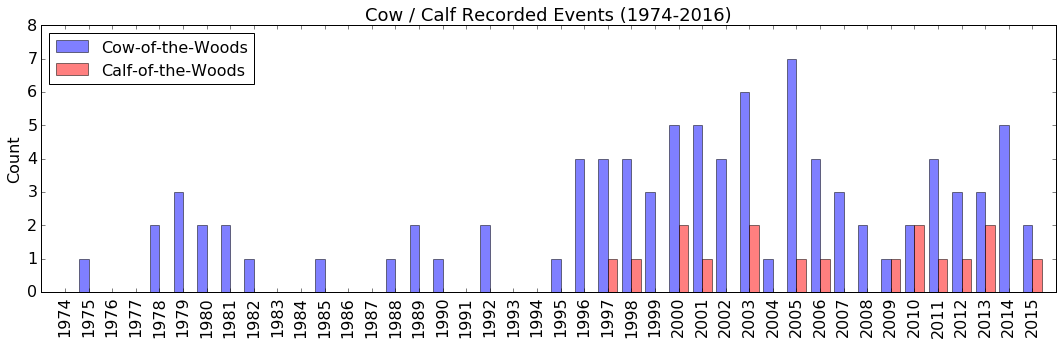

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(cow_table_shift_grouped.index-0.2, cow_table_shift_grouped.pathname, width=0.4, align='center',
       color='b', alpha=0.5, label='Cow-of-the-Woods')
ax.bar(calf_table_shift_grouped.index+0.2, calf_table_shift_grouped.pathname, width=0.4, align='center',
       color='r', alpha=0.5, label='Calf-of-the-Woods')
    
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
ax.set_ylim(0,8)
ax.set_xlim(1973,2016)
plt.title('Cow / Calf Recorded Events (1974-2016)', fontsize=18)
plt.xticks(np.arange(1974, 2016, 1))
plt.legend(loc=2, fontsize=16)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

***For x-axis years above: year indicates following season. i.e. '1995' indicates events for the '1995-96' season.***

## 4.2 Relative Size

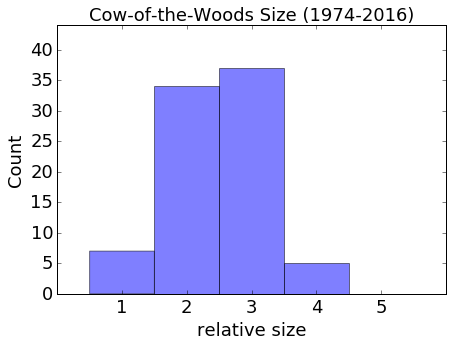

In [48]:
histoplot_size(cow_table['R size'],'Cow-of-the-Woods Size (1974-2016)', 'relative size')
histoplot_size(calf_table['R size'],'Calf-of-the-Woods Size (1974-2016)', 'relative size')

## 4.3 Type

Compared to other paths analyzed in this report, there are significantly more wet loose or wet slab events for the Cow and Calf paths:

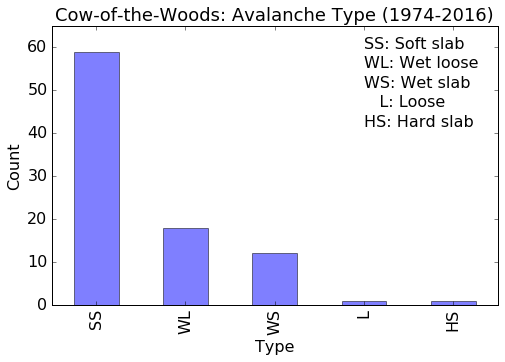

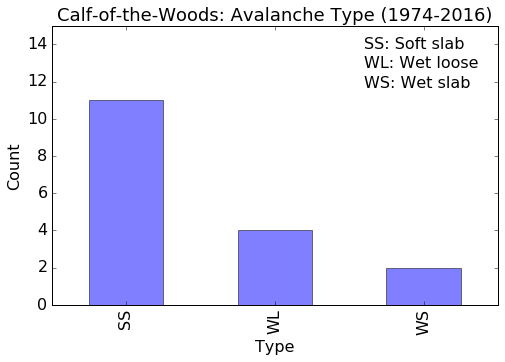

In [49]:
fig, axs = plt.subplots(1,1,figsize=(8, 5))
cow_type_counts.plot(kind='bar', alpha=0.5)
plt.xlabel('Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
axs.set_ylim(0,65)
plt.title('Cow-of-the-Woods: Avalanche Type (1974-2016)', fontsize=18)

t1 = axs.text(0.7,0.92, 'SS: Soft slab', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t2 = axs.text(0.7,0.85, 'WL: Wet loose', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t3 = axs.text(0.7,0.78, 'WS: Wet slab', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t4 = axs.text(0.7,0.71, '   L: Loose', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t5 = axs.text(0.7,0.64, 'HS: Hard slab', ha='left', color='k', fontsize=16, transform=axs.transAxes)
fig.canvas.draw()

fig, axs = plt.subplots(1,1,figsize=(8, 5))
calf_type_counts.plot(kind='bar', alpha=0.5)
plt.xlabel('Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
axs.set_ylim(0,15)
plt.title('Calf-of-the-Woods: Avalanche Type (1974-2016)', fontsize=18)

t1 = axs.text(0.7,0.92, 'SS: Soft slab', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t2 = axs.text(0.7,0.85, 'WL: Wet loose', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t3 = axs.text(0.7,0.78, 'WS: Wet slab', ha='left', color='k', fontsize=16, transform=axs.transAxes)
fig.canvas.draw()

## 4.4 Trigger

Unlike Teton Pass slide paths, the Hoback paths are unique with no human-triggers. These paths are dominated by natural events, with some control-related events:

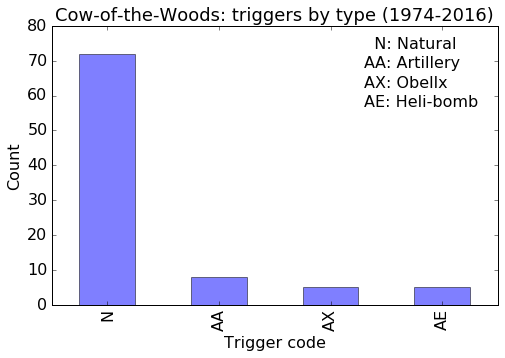

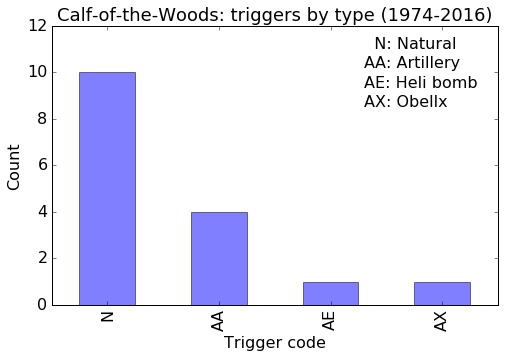

In [50]:
fig, axs = plt.subplots(1,1,figsize=(8, 5))
cow_trigger_counts.plot(kind='bar', alpha=0.5)
plt.xlabel('Trigger code', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
axs.set_ylim(0,80)
plt.title('Cow-of-the-Woods: triggers by type (1974-2016)', fontsize=18)

t1 = axs.text(0.7,0.92, '  N: Natural', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t2 = axs.text(0.7,0.85, 'AA: Artillery', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t3 = axs.text(0.7,0.78, 'AX: Obellx', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t3 = axs.text(0.7,0.71, 'AE: Heli-bomb', ha='left', color='k', fontsize=16, transform=axs.transAxes)
fig.canvas.draw()

fig, axs = plt.subplots(1,1,figsize=(8, 5))
calf_trigger_counts.plot(kind='bar', alpha=0.5)
plt.xlabel('Trigger code', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
axs.set_ylim(0,12)
plt.title('Calf-of-the-Woods: triggers by type (1974-2016)', fontsize=18)

t1 = axs.text(0.7,0.92, '  N: Natural', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t2 = axs.text(0.7,0.85, 'AA: Artillery', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t3 = axs.text(0.7,0.78, 'AE: Heli bomb', ha='left', color='k', fontsize=16, transform=axs.transAxes)
t4 = axs.text(0.7,0.71, 'AX: Obellx', ha='left', color='k', fontsize=16, transform=axs.transAxes)
fig.canvas.draw()

First, a look at the timeseries with all artificial triggers grouped:

In [51]:
# COMBINED
continuous_index = np.arange(1974, 2016, 1)

def combine_hoback(name1,name2):
    cow = name1.reindex(continuous_index).fillna(0)
    calf = name2.reindex(continuous_index).fillna(0)
    combined = cow + calf
    return combined
    
combined_N_hoback = combine_hoback(cow_trigger_N, calf_trigger_N)
combined_AA_hoback = combine_hoback(cow_trigger_AA, calf_trigger_AA)
combined_AX_hoback = combine_hoback(cow_trigger_AX, calf_trigger_AX)
combined_AE_hoback = combine_hoback(cow_trigger_AE, calf_trigger_AE)

combined_artificial_explosive_hoback = combined_AA_hoback + combined_AX_hoback + combined_AE_hoback

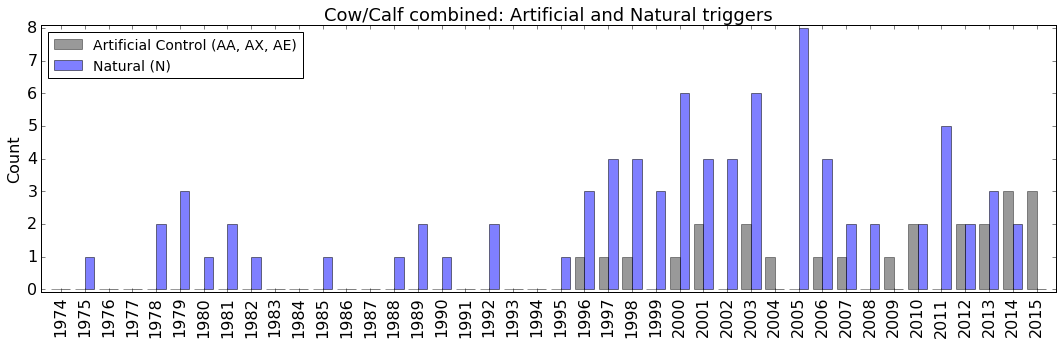

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(combined_artificial_explosive_hoback.index-0.2, combined_artificial_explosive_hoback, width=0.4, align='center',
       color='black', alpha=0.4, label='Artificial Control (AA, AX, AE)')
ax.bar(combined_N_hoback.index+0.2, combined_N_hoback, width=0.4, align='center', color='blue', alpha=0.5, label='Natural (N)')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
plt.title('Cow/Calf combined: Artificial and Natural triggers', fontsize=18)
plt.xticks(np.arange(1974, 2016, 1))
plt.legend(loc=2, fontsize=14)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

The figure below shows artificial triggers separately. Although the Obellx system was installed in fall 2013, there are no 'AX' events in the BTAC database for the 2013-14 season.

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(combined_AA_hoback.index, combined_AA_hoback, width=0.5, align='center', color='black', alpha=0.5, label='Artillery (AA)')
ax.bar(combined_AE_hoback.index, combined_AE_hoback, width=0.5, align='center', color='g', alpha=0.5, label='Heli-bomb (AE)')
ax.bar(combined_AX_hoback.index, combined_AX_hoback, width=0.5, align='center', color='orange', alpha=0.5, label='Obellx (AX)')

ax.annotate('Obellx installation', fontsize=16, xy=(2013, 3),
                xycoords='data',
                xytext=(0, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                horizontalalignment='center', verticalalignment='bottom',
                )
    
plt.axvline(x=2013,color='k', alpha=0.5, ls='dashed')

plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 16, rotation='90')
plt.yticks(fontsize = 16)
plt.title('Cow/Calf combined: AA,AX,AE triggers', fontsize=18)
plt.xticks(np.arange(1994, 2016, 1))
ax.set_ylim(0,3.5)
ax.set_xlim(1994,2016)
yint = [0,1,2,3]
plt.yticks(yint)
plt.legend(loc=2, fontsize=16)
fig.tight_layout(pad=1.5)
plt.margins(0.01)

***For x-axis years above: year indicates following season. i.e. '1995' indicates events for the '1995-96' season.***